In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#### 1. Reading data from the file

In [3]:
TC_LABELS_FILE = "../datasets/train-task2-TC.labels"

In [4]:
column_names = {"document_id": np.int32, 
                "label": np.str, 
                "idx_from": np.int32, 
                "idx_to": np.int32}

In [5]:
df = pd.read_csv(TC_LABELS_FILE, sep="\t", names=column_names.keys())

#### 2. Adding a new feature to the original table

In [6]:
df['span_length'] = df['idx_to'] - df['idx_from']

#### 3. Grouping instances by labels.

In [83]:
df_stat = df.groupby(['label']).span_length.describe().sort_values("count", ascending=False)

Adding a new feature.

In [85]:
df_stat["count_normalized"] = df_stat["count"]/df_stat["count"].sum()

In [91]:
df_stat

,count,mean,std,min,25%,50%,75%,max,count_normalized
label,,,,,,,,,
Loaded_Language,2200.0,24.807727,26.549512,3.0,11.00,18.0,29.00,541.0,0.345423
"Name_Calling,Labeling",1105.0,26.637104,20.303617,3.0,14.00,21.0,33.00,192.0,0.173497
Repetition,621.0,17.985507,20.185705,3.0,8.00,13.0,18.00,190.0,0.097504
Doubt,496.0,124.931452,97.583341,4.0,54.50,98.0,175.00,799.0,0.077877
"Exaggeration,Minimisation",493.0,45.125761,33.267095,3.0,21.00,37.0,58.00,231.0,0.077406
Appeal_to_fear-prejudice,321.0,97.523364,76.104124,4.0,37.00,78.0,139.00,444.0,0.050400
Flag-Waving,250.0,63.144000,65.349626,3.0,16.00,40.0,86.00,400.0,0.039253
Causal_Oversimplification,212.0,124.160377,73.018421,17.0,73.75,111.0,156.25,438.0,0.033286
Appeal_to_Authority,155.0,134.864516,125.407185,12.0,53.00,92.0,176.50,712.0,0.024337


#### 4. Classes sorted by frequences (absolute and relative).

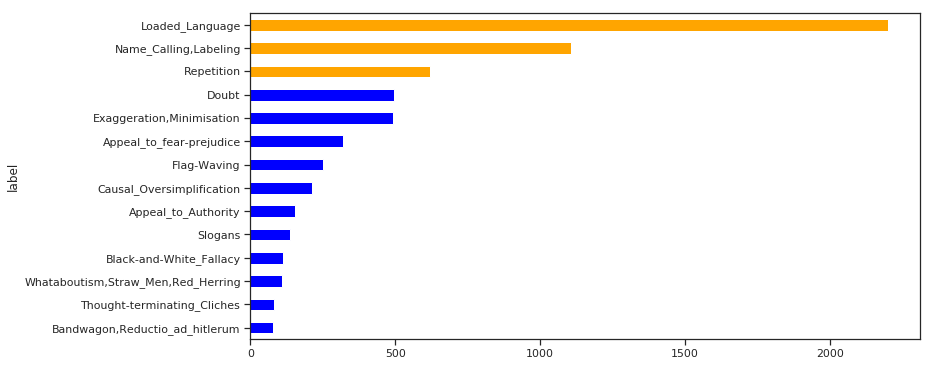

In [89]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange", "orange", "orange"]
df_stat["count"].sort_values().plot.barh(color=color_list)

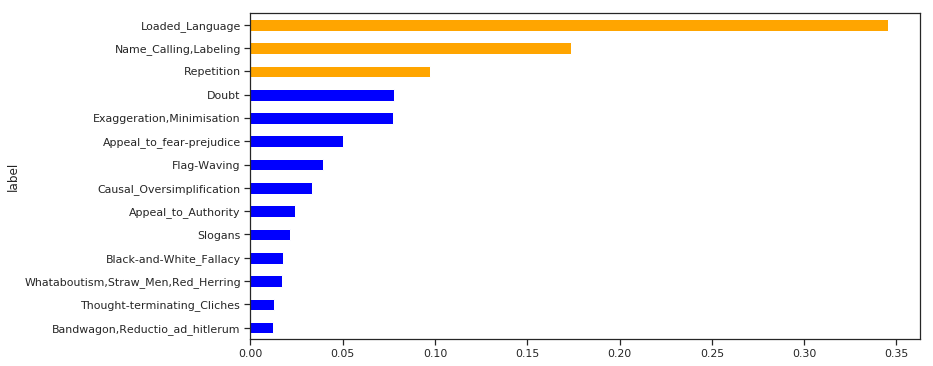

In [86]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange", "orange", "orange"]
df_stat["count_normalized"].sort_values().plot.barh(color=color_list)

#### 5. Classes by the average span length

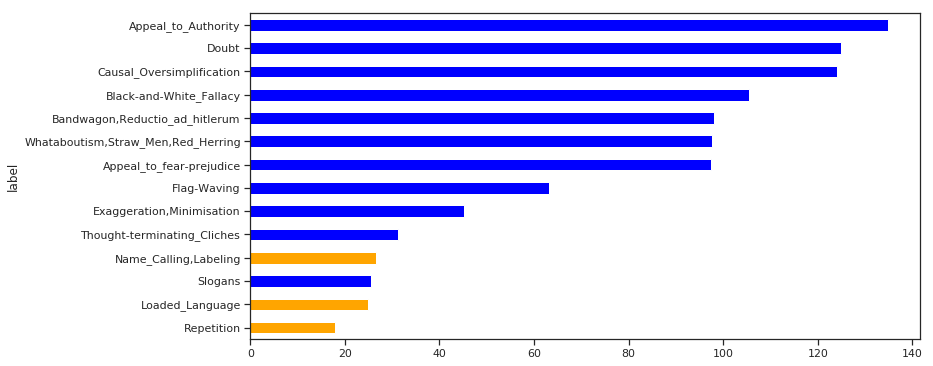

In [80]:
f, ax = plt.subplots(figsize=(12, 6))
color_list = ["orange", "orange", "blue", "orange", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"]
df.groupby("label").span_length.mean().sort_values().plot.barh(color=color_list)

An interesting observation is that three most popular classes usually have the shortest span length. While those classes represent ~60% of propaganda in the training set their average span length is around only 23 characters.

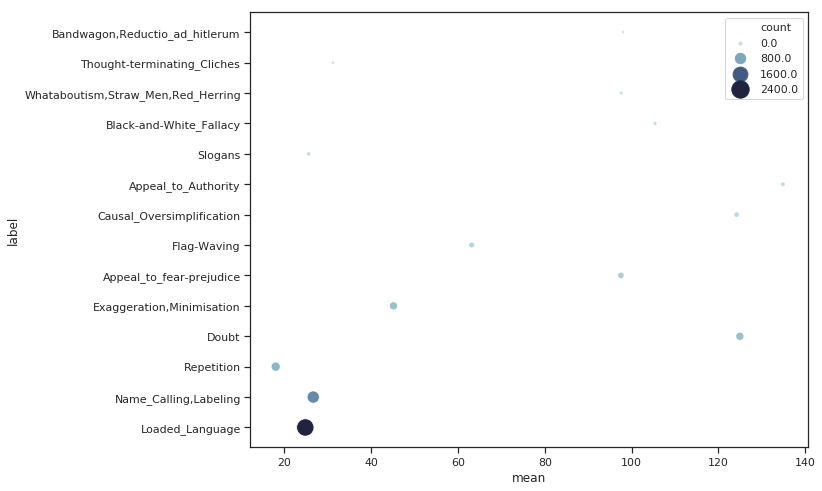

In [94]:
f, ax = plt.subplots(figsize=(10, 8))
df_stat = df_stat.reset_index()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="mean", y="label",
                     hue="count", size="count",
                     palette=cmap, sizes=(10, 300),
                     data=df_stat)